<a href="https://colab.research.google.com/github/oliverquintana/CerebralTumorClasification/blob/master/Copy_of_TumorCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Imágenes Médicas para Detección de Tumores Cerebrales
Red Neuronal Convolucional (CNN)

Oliver Jonathan Quintana Quintana

Importar imágenes y máscaras

In [11]:
from google.colab import drive
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf

drive.mount('/content/drive')

path_images = '/content/drive/My Drive/Dataset MRI/tumor_images'
path_masks = '/content/drive/My Drive/Dataset MRI/tumor_masks'
path_images_val = '/content/drive/My Drive/Dataset MRI/tumor_images_val/'
path_masks_val = '/content/drive/My Drive/Dataset MRI/tumor_masks_val/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Funciones para importar imágenes y etiquetas a arreglos 

In [0]:
def get_images(mypath):

    onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
    onlyfiles.sort()
    images = np.empty(len(onlyfiles), dtype=object)
    images = np.zeros((len(onlyfiles),256,256, 3))
    
    for n in range(len(onlyfiles)):
        images[n] = cv2.imread( join(mypath,onlyfiles[n]))

    return images

def get_labels(array):
    labels = []
    for i in array:
        if np.max(i) > 0:
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(labels)

Asignación de datos de entrenamiento y validación

In [0]:
training_images = get_images(path_images)
training_images = training_images[0:22]
training_masks = get_images(path_masks)
training_masks = training_masks[0:22]
training_labels = get_labels(training_masks)
training_labels = training_labels[0:22]
validation_images = get_images(path_images_val)
validation_masks = get_images(path_masks_val)
validation_labels = get_labels(validation_masks)

Muestra del conjunto de datos

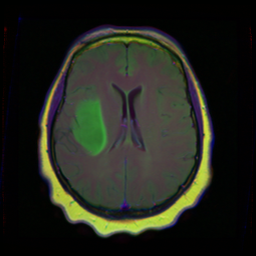

1


In [14]:
cv2_imshow(training_images[11])
print(training_labels[11])

Reajuste de dimensiones previo a entrenamiento de la CNN

In [0]:
training_images_r = training_images.reshape(len(training_images), 256, 256, 3)
validation_images_r = validation_images.reshape(len(validation_images), 256, 256, 3)

Arquitectura de la CNN

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dense(64, activation = 'relu'),
                                    tf.keras.layers.Dense(32, activation = 'relu'),
                                    tf.keras.layers.Dense(16, activation = 'relu'),
                                    tf.keras.layers.Dense(4, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'softmax')
                                    ])

Entrenamiento de la CNN

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images_r, training_labels, epochs=3)

Train on 22 samples
Epoch 1/3
22/22 [==============================] - 0s 5ms/sample - loss: nan - acc: 0.2727
Epoch 2/3
22/22 [==============================] - 0s 1ms/sample - loss: nan - acc: 0.7273
Epoch 3/3
22/22 [==============================] - 0s 950us/sample - loss: nan - acc: 0.7273


Validación del entrenamiento y resultados

In [18]:
model.evaluate(validation_images_r, validation_labels)

20/20 [==============================] - 0s 3ms/sample - loss: nan - acc: 0.6000


[nan, 0.6]